In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk

In [25]:
filePath = 'train.csv'

data_from_csv = pd.read_csv(filePath)
data_from_csv.head()

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,67.1,146,2017,0,263,262,264,62,0.01,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,271,278,264,64,0.01,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,268,246,290,66,0.01,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,272,248,296,69,0.01,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,275,278,272,71,0.01,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207


In [26]:
data_from_csv.drop(['ID'], axis=1, inplace=True)

,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,67.1,146,2017,0,263,262,264,62,0.01,71.279624,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,59.8,146,2016,0,271,278,264,64,0.01,73.523582,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,57.6,146,2015,0,268,246,290,66,0.01,73.219243,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,55.5,146,2014,0,272,248,296,69,0.01,78.184215,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,57.7,146,2013,0,275,278,272,71,0.01,7.097109,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207
5,58.9,146,2012,0,279,266,292,74,0.01,79.679367,...,66,9.20,66.0,0.1,619.73,2883167,18.4,18.4,0.448,3.033150
6,57.5,146,2011,0,281,270,292,77,0.01,56.762217,...,63,9.42,63.0,0.1,499.40,284331,18.6,18.7,0.434,2.983287
7,57.0,146,2010,0,287,276,298,80,0.03,25.873925,...,64,8.33,64.0,0.1,418.16,2729431,18.8,18.9,0.433,2.949576
8,63.0,146,2009,0,295,276,314,82,0.02,10.910156,...,63,6.73,63.0,0.1,414.22,26616792,19.0,19.1,0.415,2.898275
9,54.1,146,2008,0,295,304,286,84,0.03,17.171518,...,58,7.43,58.0,0.1,305.27,2589345,19.2,19.3,0.405,2.846050


In [27]:
def scatter_plot(feature, target):
    plt.figure(figsize=(16,8))
    plt.scatter(
        data[feature],
        data[target],
        c='black'
    )
    plt.xlabel("InfantDeaths".format(feature))
    plt.ylabel("TARGET_LifeExpectancy")
    plt.show()

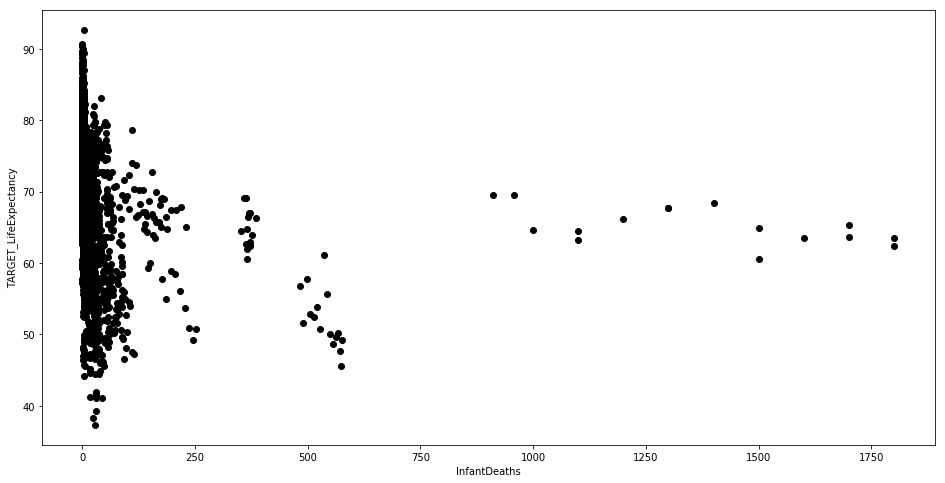

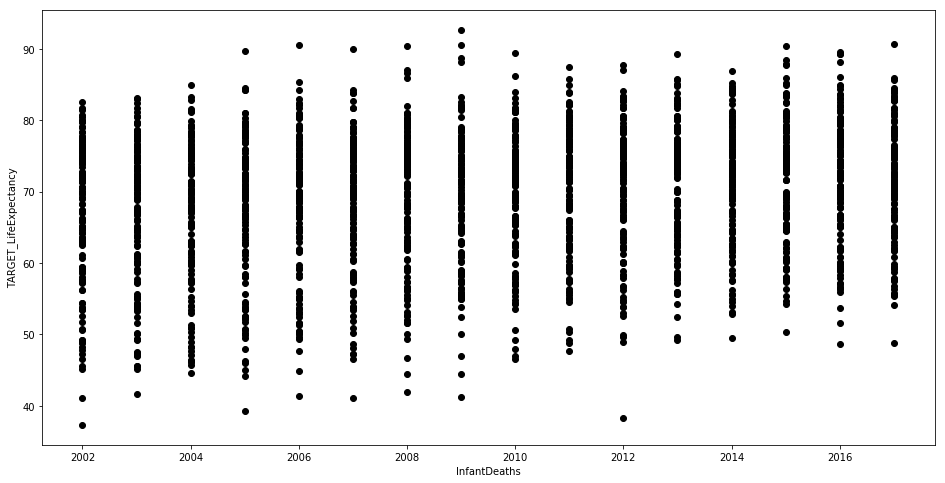

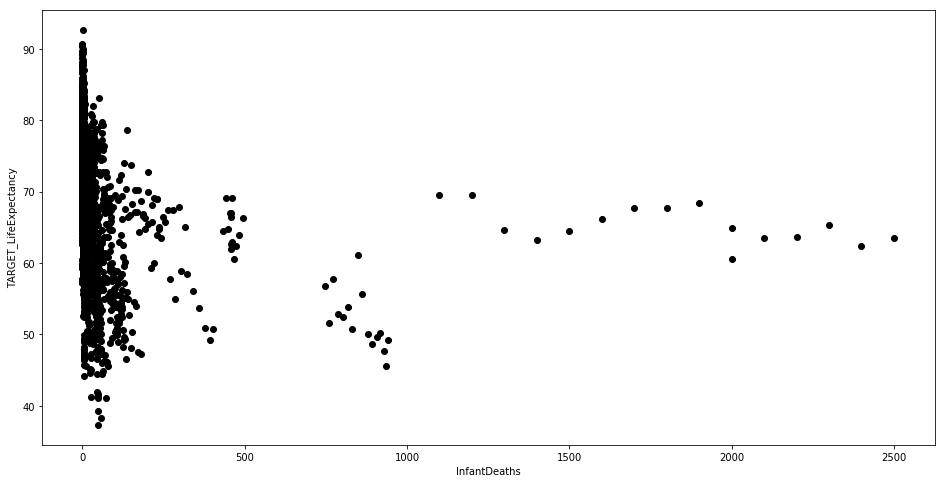

In [6]:
scatter_plot('InfantDeaths', 'TARGET_LifeExpectancy')
scatter_plot('Year', 'TARGET_LifeExpectancy')
scatter_plot('UnderFiveDeaths', 'TARGET_LifeExpectancy')

Here below the Mean Square Error for each fold has been calculated. Each fold has been taken from K Fold Cross Validation. ANd again out of these 10 Mean squared Error, the means of those has been calculated finally

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

Xs = data.drop(['TARGET_LifeExpectancy'], axis=1)
y = data['TARGET_LifeExpectancy'].values.reshape(-1,1)

lin_reg = LinearRegression()

MSEs= cross_val_score(lin_reg, Xs, y, scoring='neg_mean_squared_error', cv=10)
mean_MSE = np.mean(MSEs)

print(mean_MSE)

-24.820899475702525


<span style="color:blue; font-weight:bold; font-size:1.8em">Ridge Regression</span>

### Here we took multiple parameters of alpha in ridge regression. [Please Explain about the ridge regression parameters]. Below in Grid Search, we are passing different parameters and evaluate each model with the same parameters

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=10)

ridge_regressor.fit(Xs, y)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.650197e-28
  overwrite_a=True).T
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.663130e-28
  overwrite_a=True).T
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.142072e-28
  overwrite_a=True).T
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guara

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [10]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-24.729723455431415


Here in the above results, we can see that the best alpha value came out to be 20 and best score that is the mean squared error came out to be -24
<ul><li>Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients</li>
<li>Minimization objective = LS Obj + α * (sum of square of coefficients)</li></ul>

### Lasso

In [31]:
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = { 'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20] }

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=10)

lasso_regressor.fit(Xs, y)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordin

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [12]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-24.60419159501636


Same in the above LAsso Regression, the value of alpha came best as 0.01 whle the best score came out to be -24.6. <ul><li>Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients</li><li>Minimization objective = LS Obj + α * (sum of absolute value of coefficients)</li>
</ul>